In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
glass_data = pd.read_csv("./Dataset/glass.csv")
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# Split the dataset into features and target variable
X = glass_data.drop("Type", axis=1)
y = glass_data["Type"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print(classification_rep)

Accuracy: 0.5581395348837209
              precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



In [ ]:
# Initialize the Linear SVM classifier
svm_classifier = SVC(kernel="linear", C=1.0)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("Accuracy of the SVM model:", accuracy_svm)
print("Classification report of the SVM model:", classification_rep_svm)

Accuracy of the SVM model: 0.7441860465116279
Classification report of the SVM model:               precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.67      0.71      0.69        14
           3       0.00      0.00      0.00         3
           5       0.80      1.00      0.89         4
           6       1.00      0.67      0.80         3
           7       0.88      0.88      0.88         8

    accuracy                           0.74        43
   macro avg       0.67      0.68      0.67        43
weighted avg       0.70      0.74      0.72        43



/Users/rudra/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rudra/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rudra/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


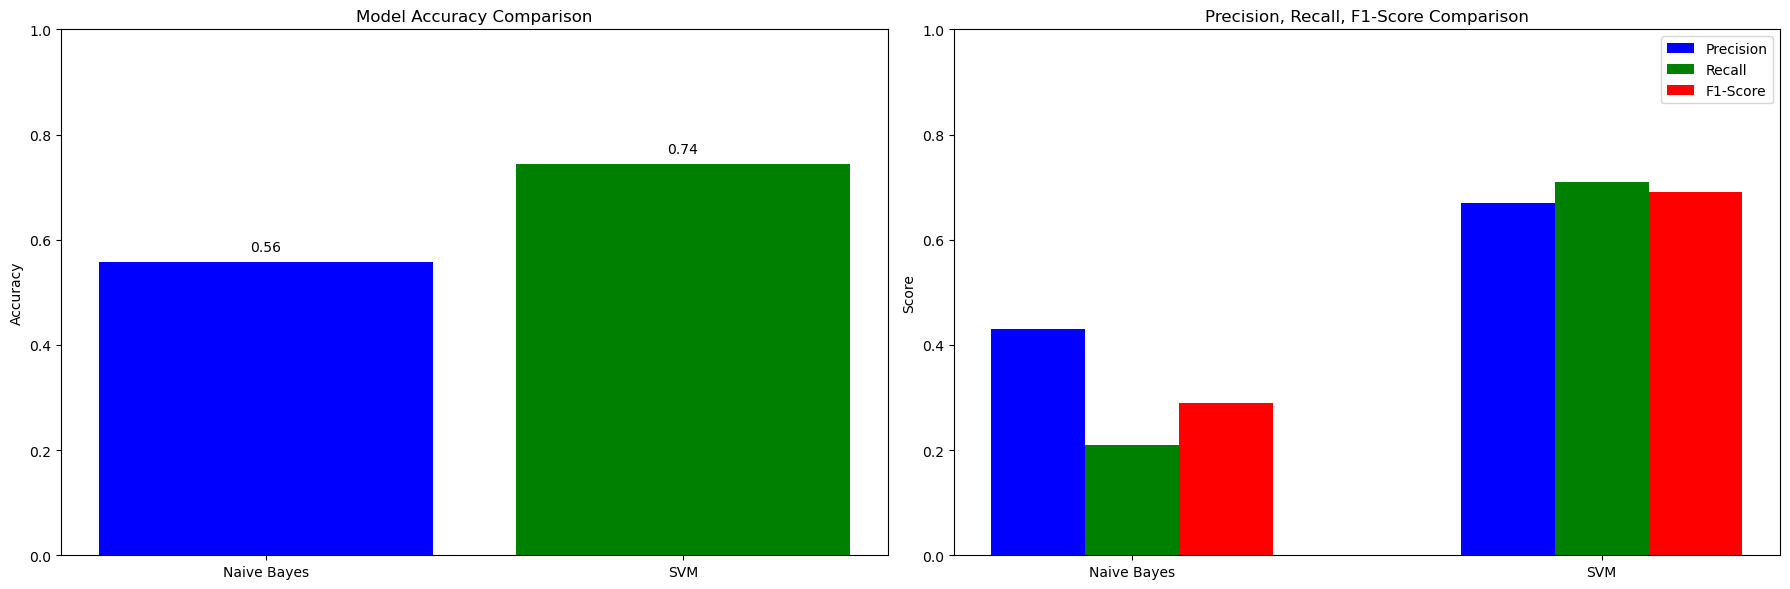

In [ ]:
# Prepare data for accuracy comparison and classification report comparison
models = ["Naive Bayes", "SVM"]
accuracies = [accuracy, accuracy_svm]

# Extract precision, recall, and f1-score for each model
precision_nb = float(classification_rep.split()[10])
recall_nb = float(classification_rep.split()[11])
f1_score_nb = float(classification_rep.split()[12])

precision_svm = float(classification_rep_svm.split()[10])
recall_svm = float(classification_rep_svm.split()[11])
f1_score_svm = float(classification_rep_svm.split()[12])

precisions = [precision_nb, precision_svm]
recalls = [recall_nb, recall_svm]
f1_scores = [f1_score_nb, f1_score_svm]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Accuracy comparison
ax[0].bar(models, accuracies, color=["blue", "green"])
ax[0].set_title("Model Accuracy Comparison")
ax[0].set_ylabel("Accuracy")
ax[0].set_ylim([0, 1])
for i, v in enumerate(accuracies):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha="center", color="black")

# Precision, Recall, F1-Score comparison
x = np.arange(len(models))
width = 0.2

ax[1].bar(x - width, precisions, width, label="Precision", color="blue")
ax[1].bar(x, recalls, width, label="Recall", color="green")
ax[1].bar(x + width, f1_scores, width, label="F1-Score", color="red")

ax[1].set_title("Precision, Recall, F1-Score Comparison")
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].set_ylabel("Score")
ax[1].set_ylim([0, 1])
ax[1].legend()

plt.tight_layout()
plt.show()

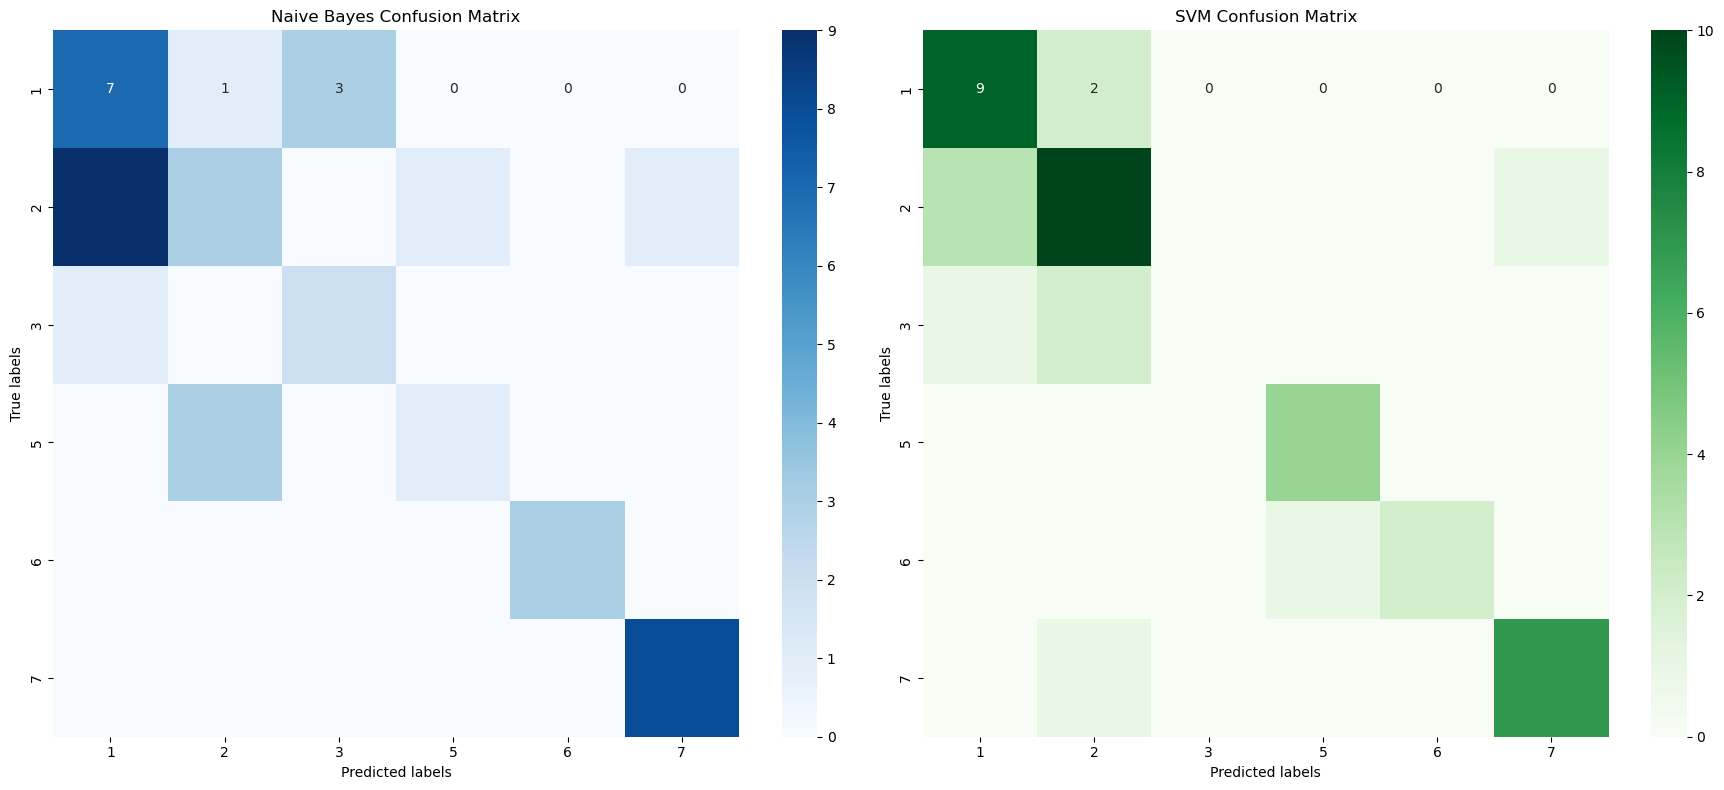

In [ ]:
conf_mat_nb = confusion_matrix(y_test, y_pred)
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Labels for the classes
class_labels = glass_data["Type"].unique()
class_labels.sort()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Naive Bayes Confusion Matrix
sns.heatmap(conf_mat_nb, annot=True, ax=ax[0], fmt="g", cmap="Blues")
ax[0].set_title("Naive Bayes Confusion Matrix")
ax[0].set_xlabel("Predicted labels")
ax[0].set_ylabel("True labels")
ax[0].set_xticklabels(class_labels)
ax[0].set_yticklabels(class_labels)

# SVM Confusion Matrix
sns.heatmap(conf_mat_svm, annot=True, ax=ax[1], fmt="g", cmap="Greens")
ax[1].set_title("SVM Confusion Matrix")
ax[1].set_xlabel("Predicted labels")
ax[1].set_ylabel("True labels")
ax[1].set_xticklabels(class_labels)
ax[1].set_yticklabels(class_labels)

plt.tight_layout()
plt.show()

The Linear Support Vector Machine (SVM) model achieved better accuracy (74.42%) compared to the Naïve Bayes model (55.81%). This improvement in accuracy can be attributed to several factors inherent in the nature of these algorithms and the characteristics of the glass dataset:

1. **Model Complexity and Assumptions**: Naïve Bayes is based on the assumption of independence among predictors within each class, which might not hold true for the glass dataset where chemical components might exhibit some correlations. SVM, especially with a linear kernel, does not make such strong assumptions about the data and is capable of finding a complex decision boundary through transformations in the feature space.

2. **Handling of Continuous Data**: The glass dataset consists of continuous features (chemical compositions and properties). Naïve Bayes handles continuous data by assuming a particular distribution (often Gaussian). If the actual distribution of features deviates significantly from this assumption, the performance might degrade. SVM, particularly with a linear kernel, is generally more adept at handling continuous and high-dimensional data, making it potentially more suitable for this dataset.

3. **Outlier Sensitivity**: Naïve Bayes is relatively robust to outliers in the data due to its probabilistic approach. However, SVM's performance can be significantly influenced by the presence of outliers, as they might affect the position of the decision boundary. In scenarios where SVM still performs better, it might indicate that the dataset's structure (including how outliers are positioned) is more amenable to the margin optimization approach used by SVM.

4. **Data Complexity and Separability**: The superior performance of SVM suggests that the dataset might be linearly separable or close to it in the high-dimensional feature space. SVM is particularly good at finding the optimal hyperplane that separates the classes, even in a high-dimensional space, which might explain the higher accuracy compared to Naïve Bayes.

In summary, the better performance of the Linear SVM model over Naïve Bayes for the glass dataset can likely be attributed to SVM's ability to handle complex, high-dimensional data without stringent assumptions about feature independence and its robustness in finding a separating hyperplane in such environments.